In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read Image Function

In [34]:
def Read_img(path):
    img= open(path,"r")
    g= img.readline()
    c= img.readline()
    rc= img.readline()
    max= img.readline()
    
    [col,row]=[int (i) for i in rc.split()]
    k=np.zeros((row,col),np.int64)
    for i in range (row):
        for j in range(col):
            k[i,j]=img.readline()
    
    img.close()
    plt.title("Input Image")
    plt.imshow(k,cmap='gray')
    return k,g,c,rc,max,col,row

#### Store/Write O/p Image Function

In [39]:
def Write_img(path,k,g,c,rc,max,col,row):
    img= open(path,"w")
    img.write(g)
    img.write(c)
    img.write(rc)
    img.write(max)
    
    for i in range(row):
        for j in range(col):
            img.write("%d\n"%k[i,j])
    plt.title("Output Image (saved)")
    img.close()

#### Histogram create and Histogram Equalization Functions

In [46]:
def Hist(k,row,col):
    """ This function is count the frequency of pexels according to the intensity level"""
    
    hist={}

    for i in range (row):
        for j in range(col):
            if k[i,j] in hist:
                hist[k[i,j]]=hist[k[i,j]]+1
            else:
                hist[k[i,j]]=1
                
    # Plot the Histogram        
    plt.figure(figsize=(20,10))
    plt.title("Histogram")
    plt.xlabel("Intensity Values")
    plt.ylabel("Frequencies")
    plt.bar(range(len(hist)), list(hist.values()), align='center',width=0.6)
    plt.xticks(range(len(hist)), list(hist.keys()))
    plt.show()

    return hist

def Hist_eqalize(k,row,col,max):
    """ This function convert the original Histogram into Equalize Histogram """

    hist=Hist(k,row,col)
    pdf={}
    cdf={}
    f={}
    arr=np.zeros((row,col),np.int64)
    sum=0
    for i in hist.keys():
        pdf[i]=hist[i]/(row*col)
        sum=sum+pdf[i]
        cdf[i]=sum
        f[i]=np.ceil(cdf[i]*int(max))

    for i in range(row):
        for j in range(col):
            arr[i,j]=f[k[i,j]]
    
    new_nk=Hist(arr,row,col)
    # display output
    # plt.title("Output Image")
    # plt.imshow(arr,cmap='gray')
    return hist,f,new_nk,arr

### Histogram Mapping/ Specification

In [ ]:
def Hist_specification(hist2,hist1,new_nk1,row2,col2):
    mapped_hist={}
    mapped_nk={}
    arr=np.zeros((row,col),np.int64)
    for i in hist2.keys():
        mapped_hist[i]=

### Main Function( Histogram Equalizaton)

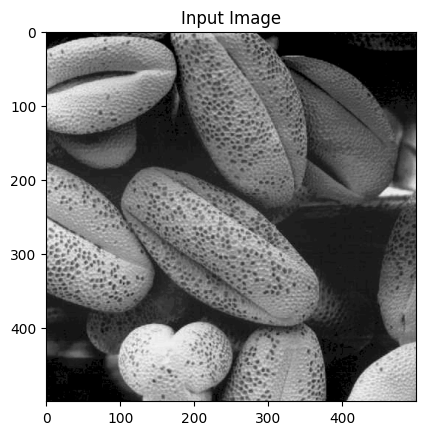

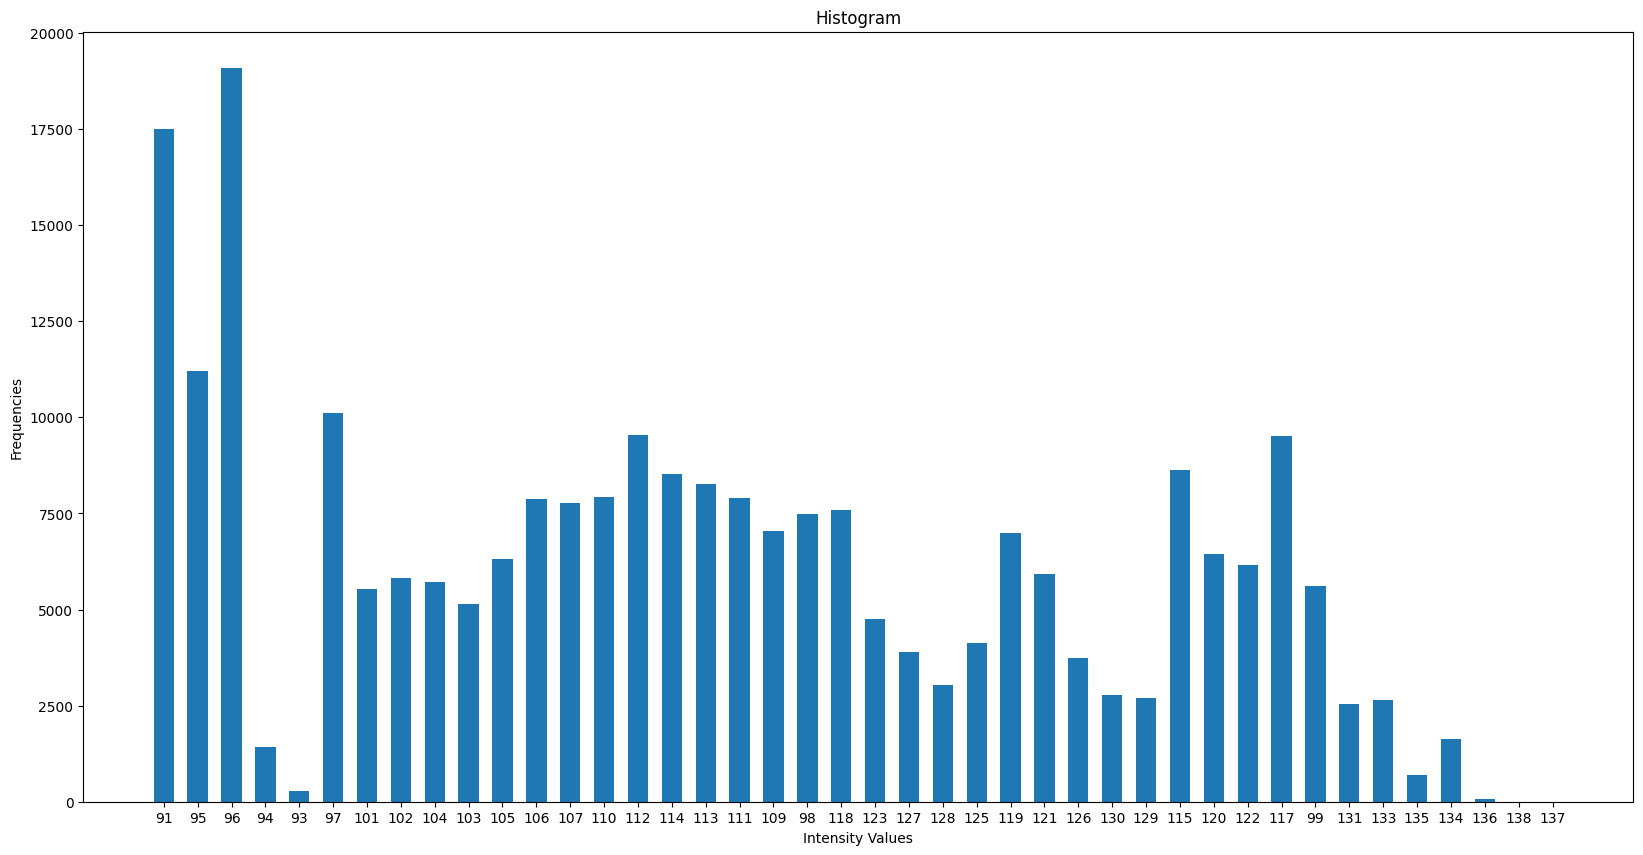

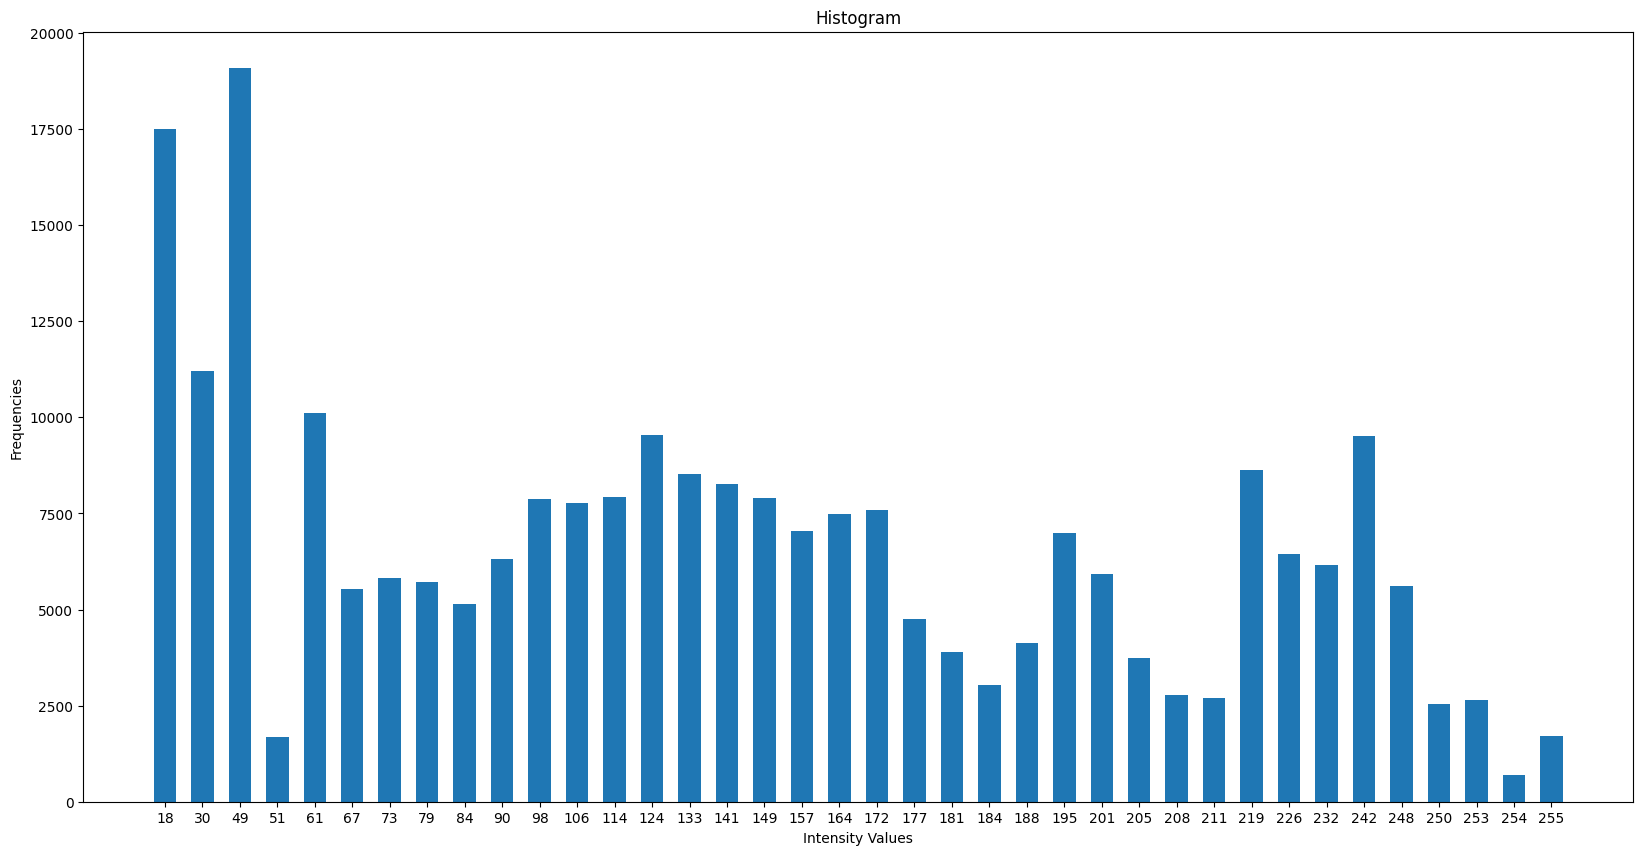

In [44]:
if __name__ == '__main__':
    k1,g1,c1,rc1,max1,col1,row1= Read_img("..\images\DIP3E_Original_Images_CH03\Fig0320(2)(2nd_from_top).pgm") #Read Image
    original_img_hist, equalized_hist, new_img= Hist_eqalize(k1,row1,col1,max1)

    # Store output to a file
    # Write_img("outputs\\hist_equalize.pgm",new_img,g1,c1,rc1,max1,col1,row1)

### Main Function (Histogram Specification)

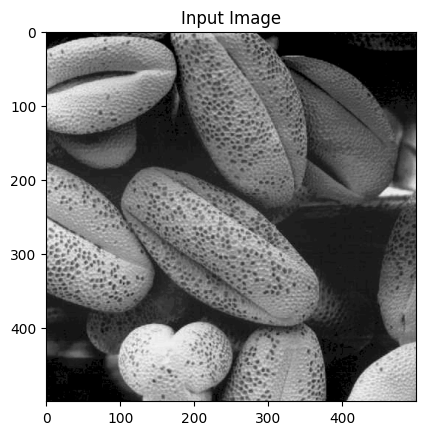

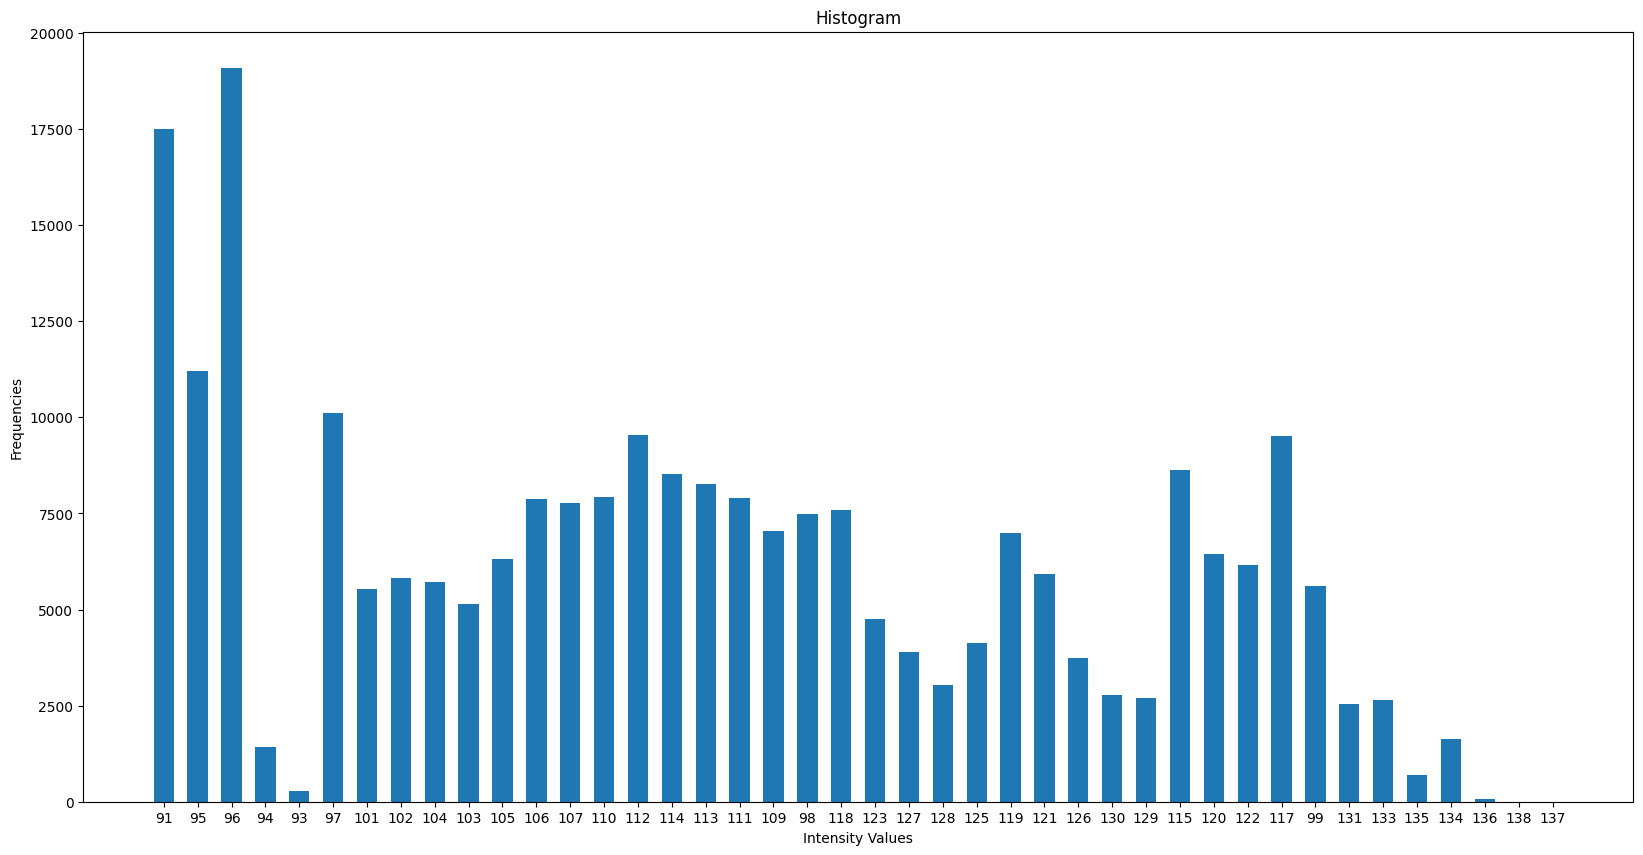

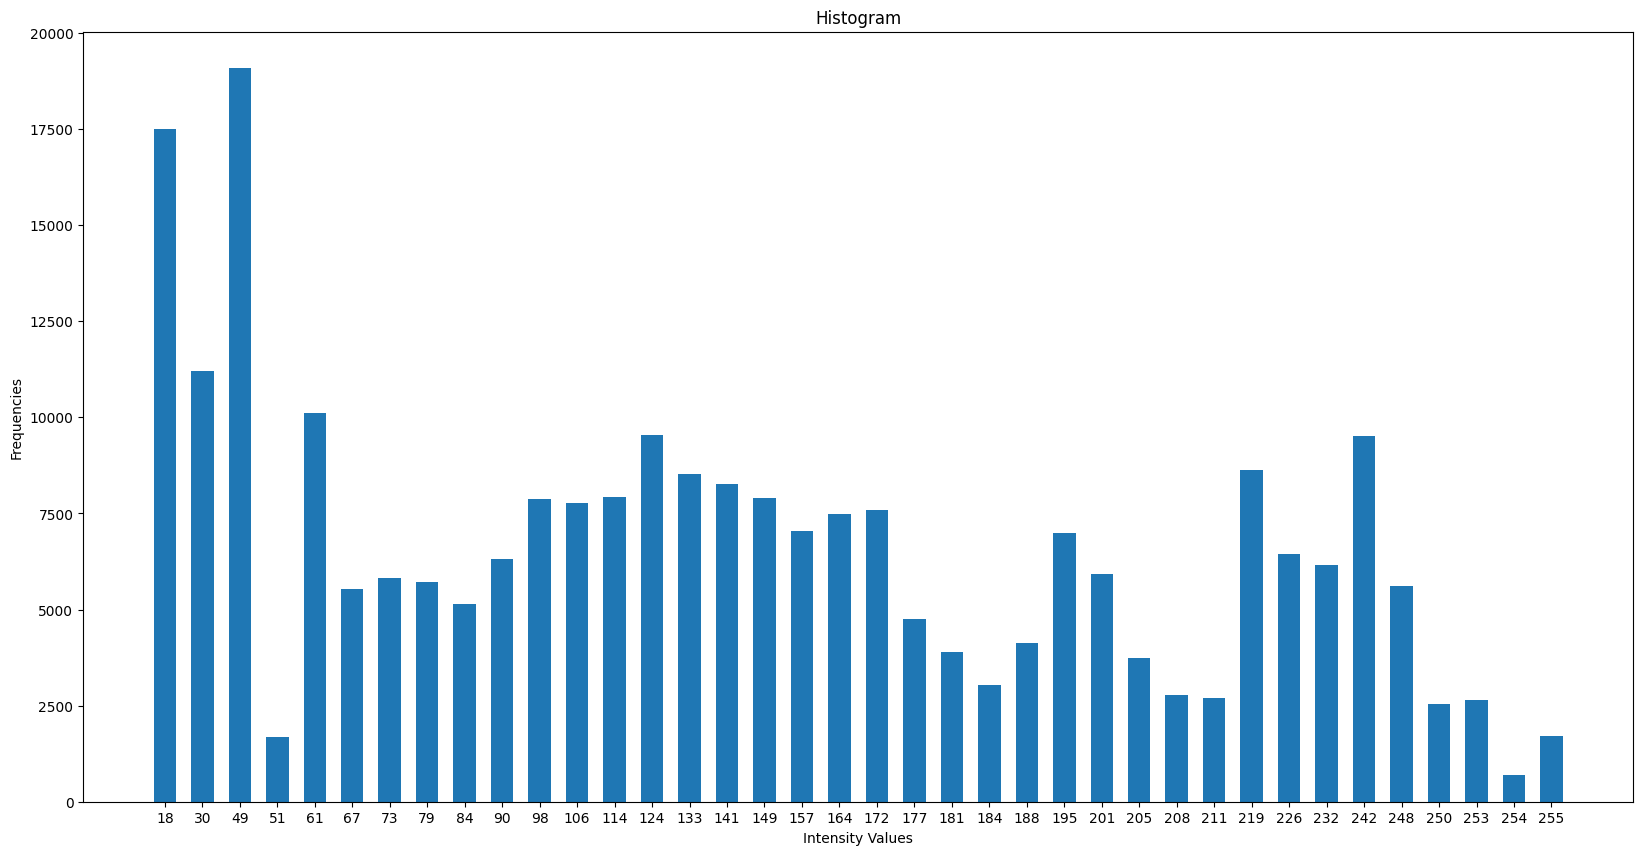

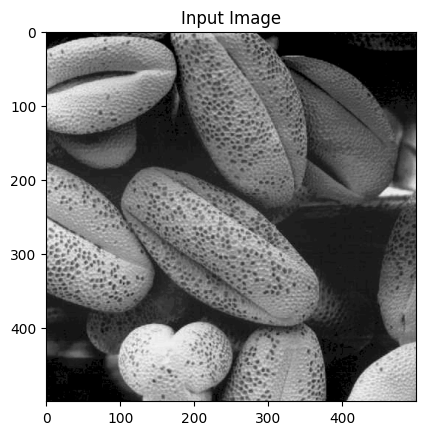

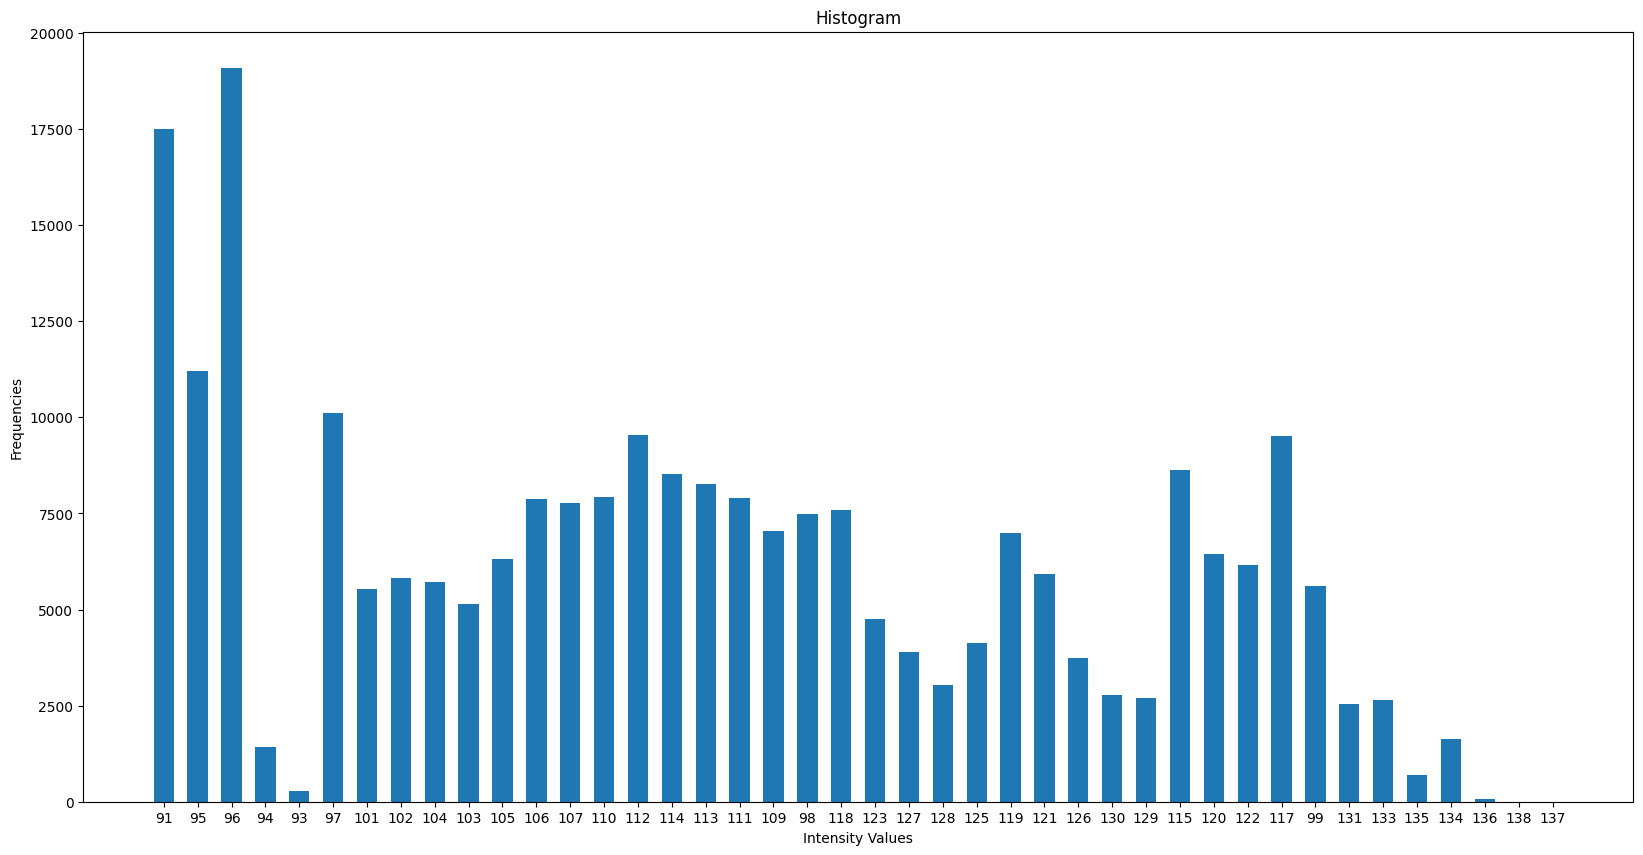

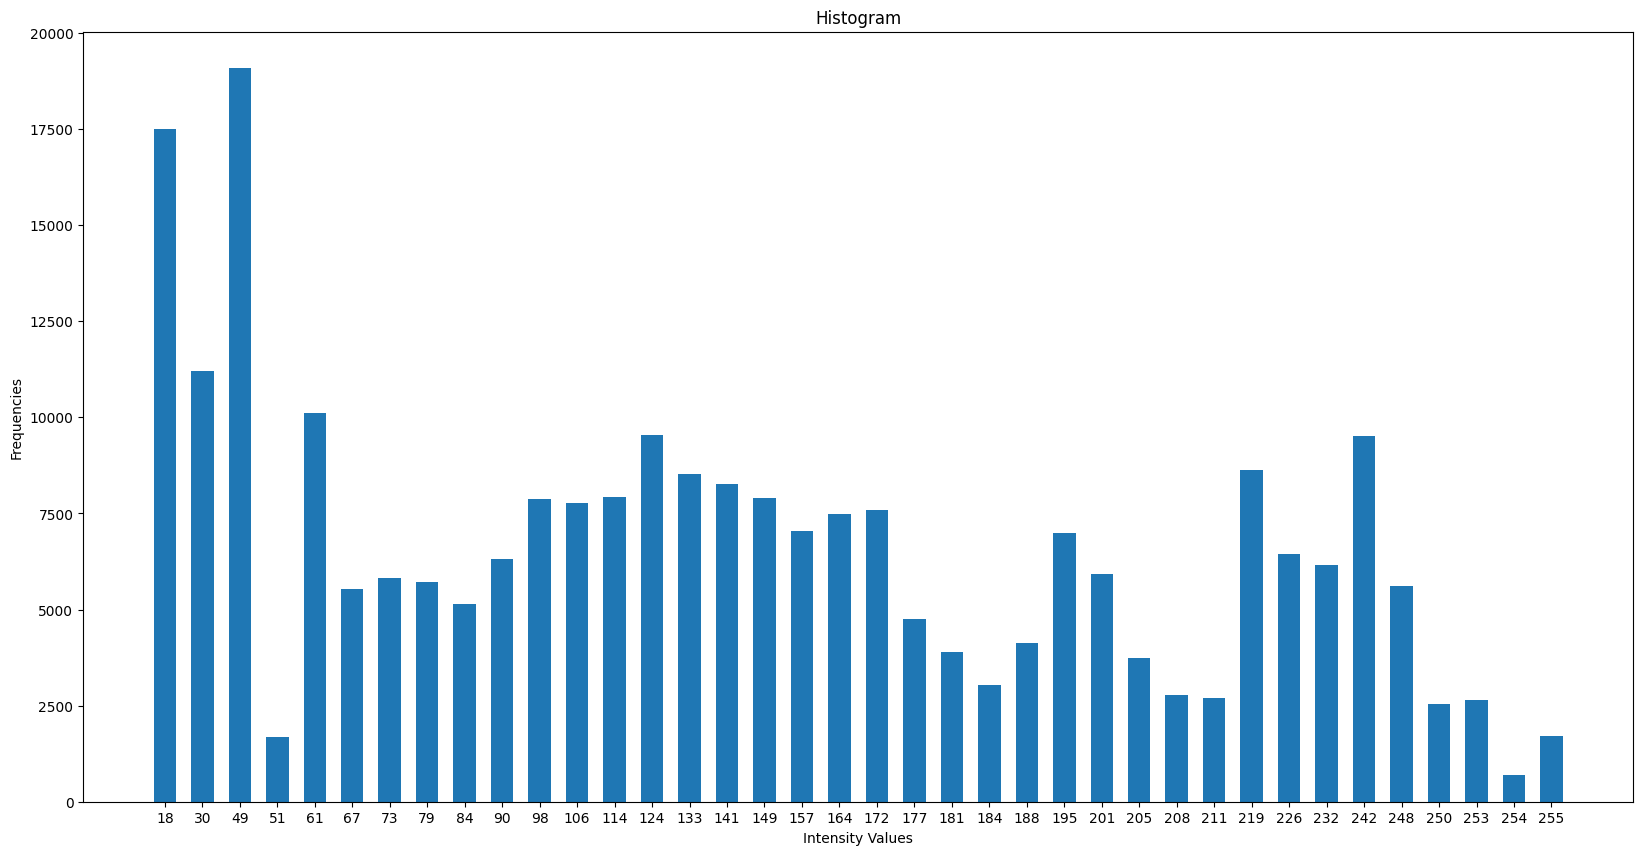

{18: 17496, 30: 11200, 49: 19078, 51: 1696, 61: 10121, 67: 5523, 73: 5816, 79: 5711, 84: 5131, 90: 6306, 98: 7888, 106: 7767, 114: 7934, 124: 9535, 133: 8524, 141: 8271, 149: 7913, 157: 7053, 164: 7494, 172: 7593, 177: 4759, 181: 3896, 184: 3039, 188: 4123, 195: 7002, 201: 5932, 205: 3746, 208: 2781, 211: 2705, 219: 8624, 226: 6438, 232: 6158, 242: 9526, 248: 5604, 250: 2555, 253: 2655, 254: 697, 255: 1710} {18: 17496, 30: 11200, 49: 19078, 51: 1696, 61: 10121, 67: 5523, 73: 5816, 79: 5711, 84: 5131, 90: 6306, 98: 7888, 106: 7767, 114: 7934, 124: 9535, 133: 8524, 141: 8271, 149: 7913, 157: 7053, 164: 7494, 172: 7593, 177: 4759, 181: 3896, 184: 3039, 188: 4123, 195: 7002, 201: 5932, 205: 3746, 208: 2781, 211: 2705, 219: 8624, 226: 6438, 232: 6158, 242: 9526, 248: 5604, 250: 2555, 253: 2655, 254: 697, 255: 1710}
{91: 18.0, 95: 30.0, 96: 49.0, 94: 51.0, 93: 51.0, 97: 61.0, 101: 67.0, 102: 73.0, 104: 79.0, 103: 84.0, 105: 90.0, 106: 98.0, 107: 106.0, 110: 114.0, 112: 124.0, 114: 133.0, 113

In [49]:
if __name__ == '__main__':
    k1,g1,c1,rc1,max1,col1,row1= Read_img("..\images\DIP3E_Original_Images_CH03\Fig0320(2)(2nd_from_top).pgm") #Read Image-1
    original_img_hist1, equalized_hist1, new_nk1 , new_img= Hist_eqalize(k1,row1,col1,max1) #perform histogram eqalization in image-1
    k2,g2,c2,rc2,max2,col2,row2= Read_img("..\images\DIP3E_Original_Images_CH03\Fig0320(2)(2nd_from_top).pgm") #Read Image-2
    original_img_hist2, equalized_hist2,new_nk2, new_img= Hist_eqalize(k2,row2,col2,max2) #perform histogram eqalization in image-2

    #Perform Histogram Specification

    # print(new_nk1, new_nk2)
    # print(equalized_hist1,equalized_hist2)

    maped_hist,new_nk3,new_img= Hist_specification(equalized_hist2,equalized_hist1,new_nk1,row2,col2)

In [56]:
l=list(equalized_hist1.keys())
l.sort()
l

[91,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 133,
 134,
 135,
 136,
 137,
 138]